## How to use c2 chunkwise (temporary)

__Frank Wolfe sampling method is quite costly, so it is important to do it in small chunks for testing. Code below demonstrates one way to do this. c2 will be updated with its own chunking function in the future.__

Sampling function will also be able to handle df with non-numeric column values.

In [24]:
import c2
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/mnt/c/Users/ryanf/Desktop/learn2therm_sample_50k.csv')

In [3]:
# Features selected by Logan that have significantly tailed distributions
features = ['local_gap_compressed_percent_id', 'scaled_local_query_percent_id', 
            'scaled_local_symmetric_percent_id', 'query_align_len', 'subject_align_len', 
                'subject_align_cov', 'bit_score', 'm_protein_len', 't_protein_len']

In [18]:
sample_df = df.sample(0)
for i in range(50):
    step_df = df[i*1000:(i+1)*1000]
    clean_df = step_df[features]
    _, idx = c2.validprot_sample(clean_df, size = 10, stat_samp = 'frankwolfe')
    sample_df = pd.concat([sample_df, step_df.iloc[idx]], axis = 0)
    

In [22]:
sample_df.to_csv('/mnt/c/Users/ryanf/Desktop/FW_demo_500.csv')

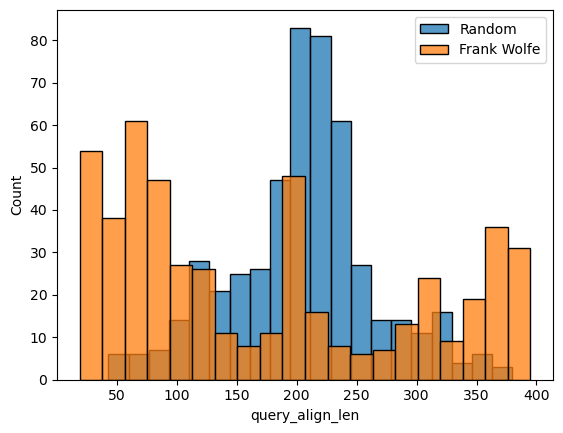

In [32]:
sns.histplot(df.sample(500), x = 'query_align_len', bins = 20, label = 'Random')
sns.histplot(sample_df, x = 'query_align_len', bins = 20, label = 'Frank Wolfe')
plt.legend()